In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMG_SIZE=224
BATCH_SIZE=32

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/brain/train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

Found 240 images belonging to 2 classes.


In [ ]:
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/brain/train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
    )

Found 59 images belonging to 2 classes.


In [ ]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 7s/step - accuracy: 0.6802 - loss: 0.7514 - val_accuracy: 0.7797 - val_loss: 0.5078
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.8548 - loss: 0.4260 - val_accuracy: 0.7458 - val_loss: 0.5943
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.8449 - loss: 0.3837 - val_accuracy: 0.7458 - val_loss: 0.6436
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.8473 - loss: 0.3807 - val_accuracy: 0.8136 - val_loss: 0.5962
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.8447 - loss: 0.3234 - val_accuracy: 0.7966 - val_loss: 0.4419


In [ ]:
model.save('/content/drive/MyDrive/myproject.h5')

Model Loaded


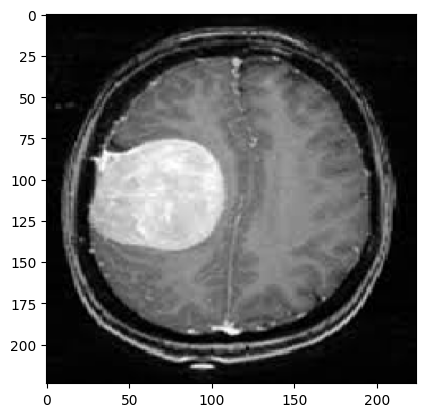

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/myproject.h5')
print("Model Loaded")
test_image_path="/content/drive/MyDrive/brain/test/pred/Y1.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /=255.


In [ ]:
prediction = model (img_array)
print(prediction)
if prediction  >=0.5:
  print("You  have Brain Tumor.")
else:
  print("You don't have Brain Tumor.")


tf.Tensor([[0.9736826]], shape=(1, 1), dtype=float32)
You  have Brain Tumor.
